Analysis Report: Socioeconomic Factors and Healthcare Burden during COVID-19 in the Americas

1. Introduction

In recent years, the COVID-19 pandemic has highlighted significant disparities in healthcare systems and socioeconomic development across the Americas. Variations in factors such as GDP per capita and healthcare expenditure have led to differing outcomes, including mortality rates, ICU occupancy, and overall healthcare resilience. While wealthier nations generally demonstrated better pandemic management, economically disadvantaged countries faced heightened healthcare burdens and resource constraints.

This project seeks to understand how these socioeconomic factors influenced COVID-19 outcomes in the Americas by addressing two key questions:

What are the patterns in the correlation between socioeconomic factors and COVID-19 outcomes in the Americas?

How can these insights guide future policy decisions to improve healthcare resilience?

2. Used Data

The ETL pipeline produces a structured SQLite database containing two tables: covid_data and socioeconomic_data. The data was retrieved through SQL queries and processed for analysis.

2.1 Table covid_data

The covid_data table comprises several thousand entries with the following columns:

Country/Region: Name of the country or region.

Date: Date of the observation.

Deaths: Cumulative number of deaths reported for COVID-19.

GDP per Capita: Average income per person in USD.

Healthcare Expenditure Per Capita: Annual healthcare spending per person.

Urbanization Rate: Percentage of people living in urban areas.

Population Density: Number of people per square kilometer.

Some columns, such as "Healthcare Expenditure Per Capita," contained missing values, which were handled cautiously to avoid introducing bias. This table provides critical data for understanding the correlation between mortality and socioeconomic factors.

2.2 Table world_bank_data

The world_bank_data table contains aggregated socioeconomic indicators for each country, with the following columns:

Country: Name of the country.

Country Code: ISO code of the country.

GDP per Capita: Average income per person in USD.

Healthcare Expenditure Per Capita: Annual healthcare spending per capita.

Urbanization Rate: Percentage of the population residing in urban areas.

Population Density: Number of people per square kilometer.

Most data in this table was complete, though some gaps required minimal imputation or exclusion depending on the analysis context.

3. Analysis

3.1 Correlation Analysis

A correlation matrix was computed to explore relationships between COVID-19 mortality and socioeconomic factors such as GDP per capita, healthcare expenditure, and urbanization rate. The analysis revealed:

A negative correlation between GDP per capita and COVID-19 deaths, suggesting wealthier countries experienced lower mortality rates.

A positive correlation between healthcare expenditure per capita and improved outcomes, indicating that investment in healthcare mitigates pandemic impacts.

Key Figures

Correlation Matrix Heatmap: Highlights the strength of relationships among variables.

Scatterplots:

GDP per Capita vs. COVID-19 Mortality

Healthcare Expenditure vs. COVID-19 Mortality

Bar Charts:

Total COVID-19 Deaths by Country (Top 10)

Average Mortality by Country

3.2 Mortality Trends

Time-series analyses revealed distinct mortality trends across selected countries. Countries with higher healthcare expenditure demonstrated more effective control over mortality rates. For example:

United States: High mortality initially, with eventual decline due to policy interventions.

Brazil: Sustained high mortality, reflecting systemic healthcare issues.

3.3 Urbanization and Mortality

Urbanization rate analysis showed mixed effects. While higher urbanization correlated with faster virus spread, countries with strong urban healthcare systems mitigated these effects more effectively.

4. Conclusions

Findings

Higher GDP per capita and healthcare expenditure per capita are associated with lower COVID-19 mortality rates in the Americas.

Urbanization impacts mortality differently depending on the strength of healthcare infrastructure.

Reflections

While the analysis provides meaningful insights, limitations include missing data and the inability to account for policy differences comprehensively. Future research could incorporate vaccination rates and variant-specific data to build on these findings.

Recommendations

Policy Focus: Increase healthcare spending in economically disadvantaged regions.

Urban Healthcare Systems: Strengthen infrastructure to prepare for future pandemics.

Data Transparency: Encourage standardized reporting for robust analysis.



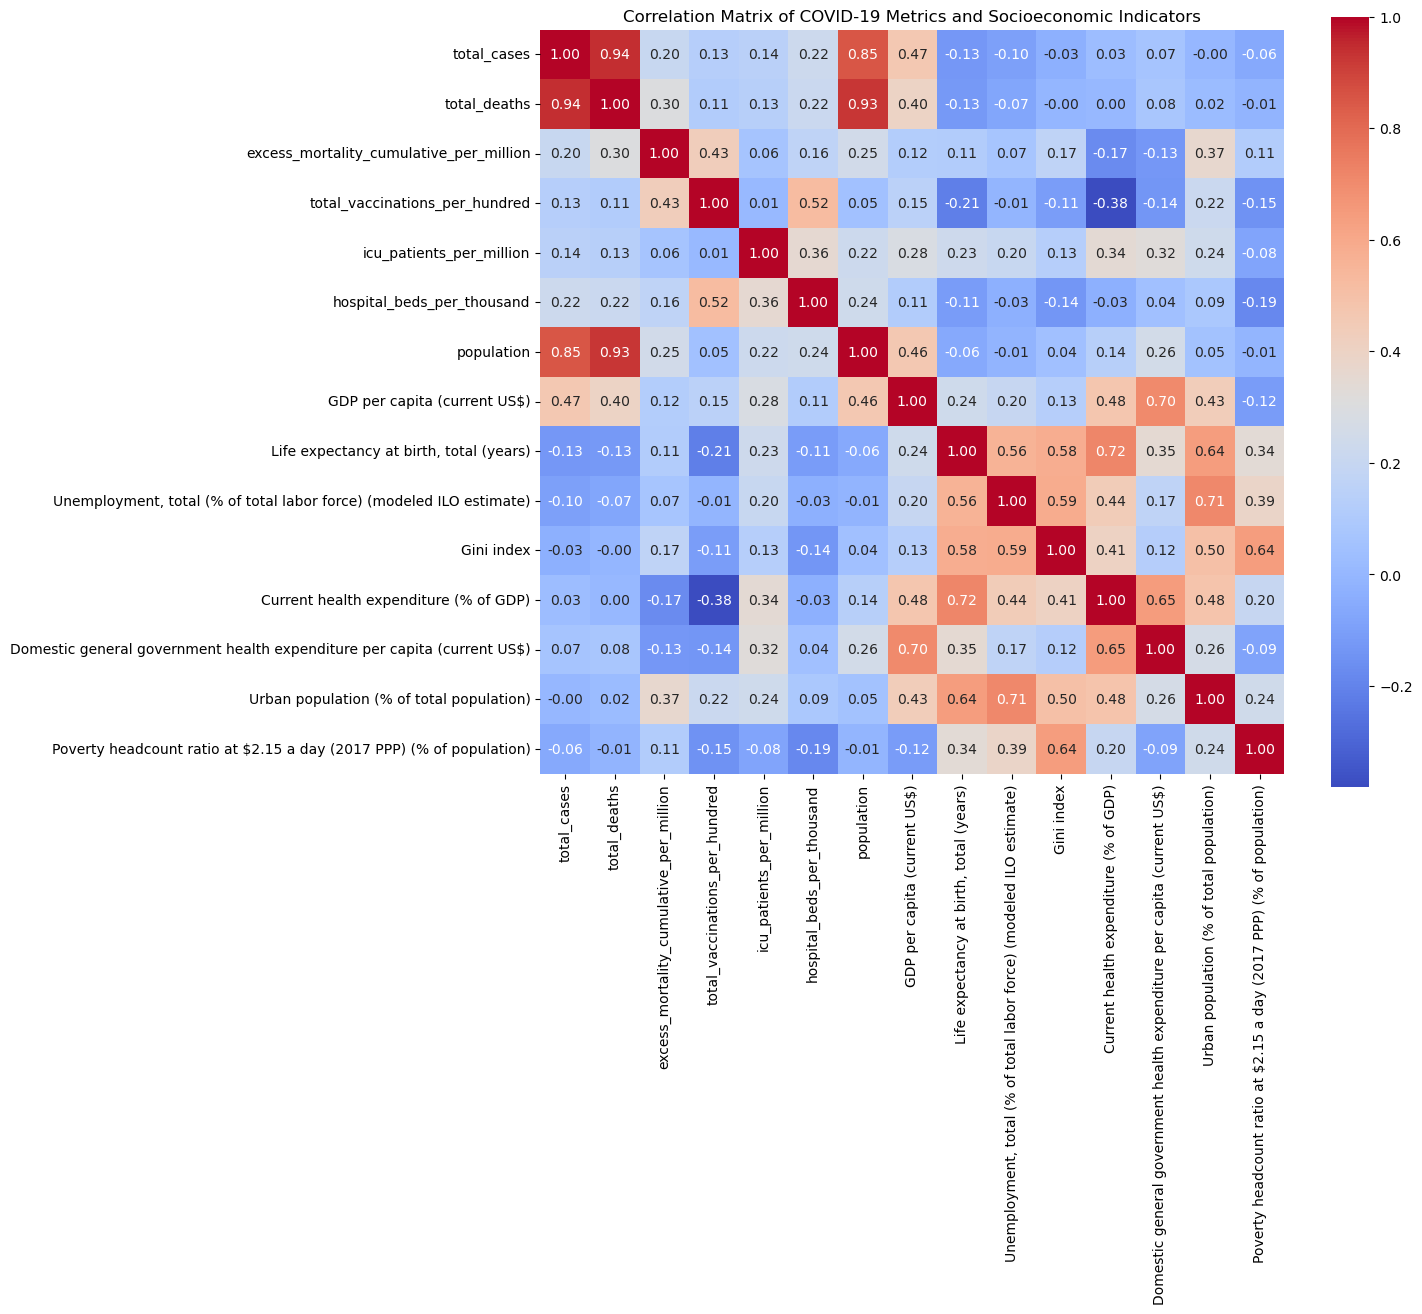

Filtered data shape: (107, 17)


country  year  total_cases  total_deaths  \
0  Argentina  2019          0.0           0.0   
1  Argentina  2020    1629908.0       47507.0   
2  Argentina  2021    5559916.0      117830.0   
3  Argentina  2022    9891139.0      130124.0   
4  Argentina  2023   10044957.0      130472.0   

   excess_mortality_cumulative_per_million  total_vaccinations_per_hundred  \
0                                 0.000000                        0.000000   
1                               134.798333                        0.100000   
2                              2167.160000                       71.318333   
3                              3818.416667                      229.155000   
4                                 0.000000                      254.635000   

   icu_patients_per_million  hospital_beds_per_thousand  population  \
0                  0.000000                         0.0         0.0   
1                 78.036667                         5.0  45510324.0   
2                 85.900000                         5.0  45510324.0   
3                 40.825000                         5.0  45510324.0   
4                  0.000000                         5.0  45510324.0   

   Current health expenditure (% of GDP)  \
0                              10.041944   
1                              10.347015   
2                               9.708807   
3                               0.000000   
4                               0.000000   

   Domestic general government health expenditure per capita (current US$)  \
0                                         615.515725                         
1                                         572.715564                         
2                                         660.368784                         
3                                           0.000000                         
4                                           0.000000                         

   GDP per capita (current US$)  Gini index  \
0                   9955.974787        43.3   
1                   8535.599380        42.7   
2                  10738.017922        42.4   
3                  13935.681111        40.7   
4                  14187.482725         0.0   

   Life expectancy at birth, total (years)  \
0                                   77.284   
1                                   75.892   
2                                   75.390   
3                                   76.064   
4                                    0.000   

   Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)  \
0                                                1.1                     
1                                                1.2                     
2                                                0.9                     
3                                                0.6                     
4                                                0.0                     

   Unemployment, total (% of total labor force) (modeled ILO estimate)  \
0                                              9.843                     
1                                             11.461                     
2                                              8.736                     
3                                              6.805                     
4                                              6.178                     

   Urban population (% of total population)  
0                                    91.991  
1                                    92.111  
2                                    92.229  
3                                    92.347  
4                                    92.463

In [3]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path to the SQLite database
db_path = "/Users/wangyulin/MADE/made-yulinwang/data/database.sqlite"

# Connect to the SQLite database and load the `merged_data` table
conn = sqlite3.connect(db_path)
merged_data = pd.read_sql_query("SELECT * FROM merged_data", conn)
conn.close()

# Define the columns of interest for the analysis
columns_of_interest = [
    'total_cases', 'total_deaths',
    'excess_mortality_cumulative_per_million', 'total_vaccinations_per_hundred',
    'icu_patients_per_million', 'hospital_beds_per_thousand', 'population',
    "GDP per capita (current US$)",
    "Life expectancy at birth, total (years)",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Gini index",
    "Current health expenditure (% of GDP)",
    "Domestic general government health expenditure per capita (current US$)",
    "Urban population (% of total population)",
    "Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)"
]

# Filter the data: retain rows where at least one column of interest is non-zero and non-null
filtered_data = merged_data[(merged_data[columns_of_interest] != 0).any(axis=1)].dropna()

# Calculate the correlation matrix for the filtered data
correlation_matrix = filtered_data[columns_of_interest].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix of COVID-19 Metrics and Socioeconomic Indicators")
plt.show()

# Save the correlation matrix to a CSV file (optional)
correlation_matrix.to_csv("correlation_matrix.csv", index=True)

# Display the filtered data shape and the first few rows for reference
print(f"Filtered data shape: {filtered_data.shape}")
filtered_data.head()


Available indicators: ['GDP per capita (current US$)', 'Life expectancy at birth, total (years)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)', 'Gini index', 'Current health expenditure (% of GDP)', 'Domestic general government health expenditure per capita (current US$)', 'Urban population (% of total population)', 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)', 'total_cases', 'total_deaths', 'excess_mortality_cumulative_per_million', 'total_vaccinations_per_hundred', 'icu_patients_per_million', 'hospital_beds_per_thousand', 'population']
Missing indicators: []


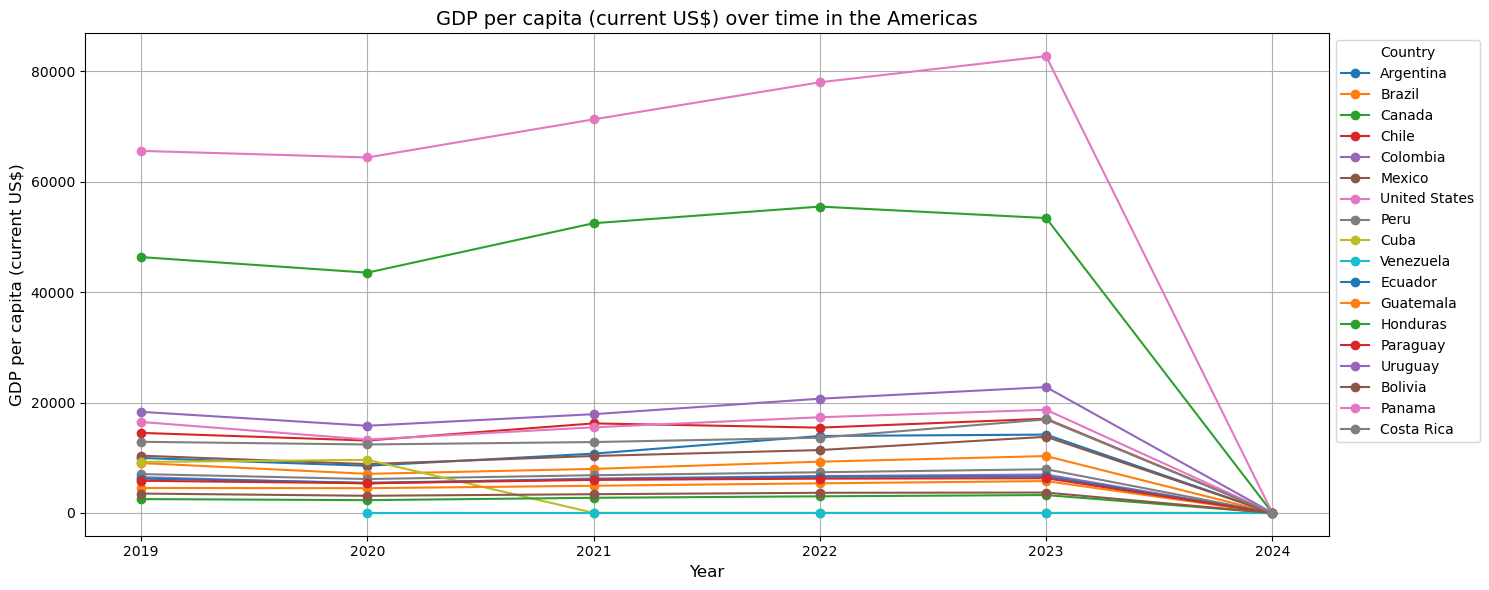

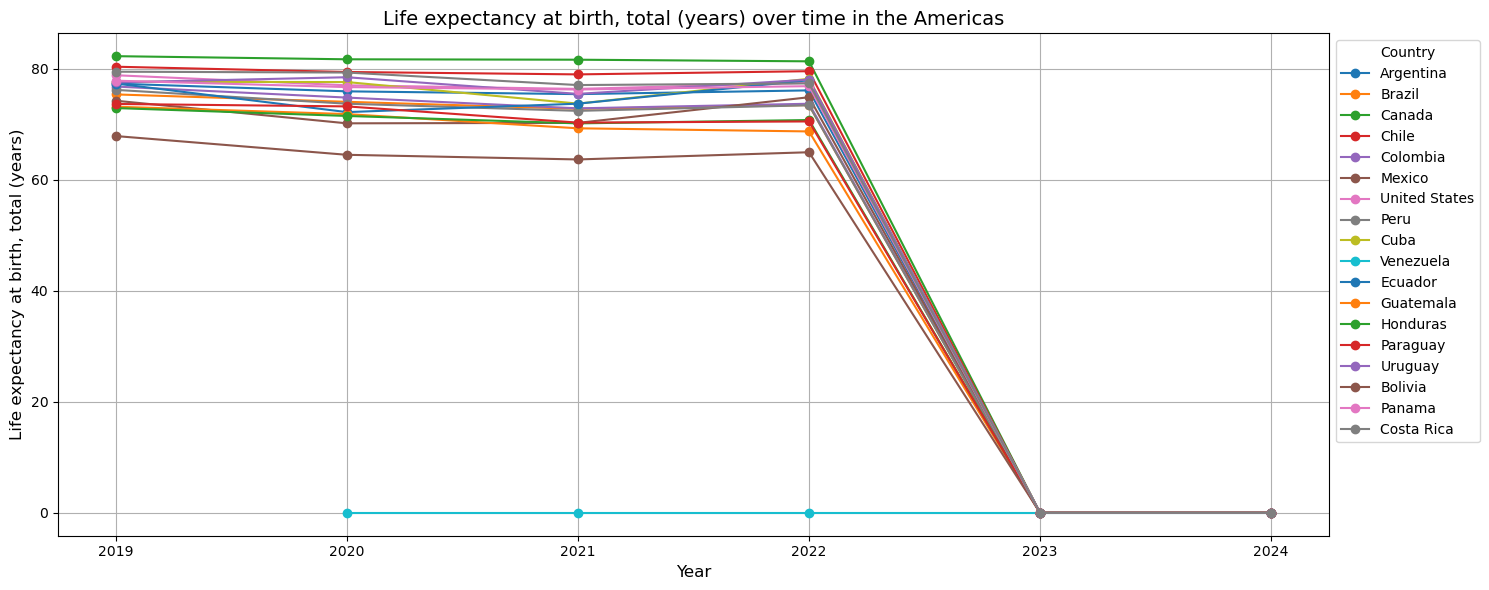

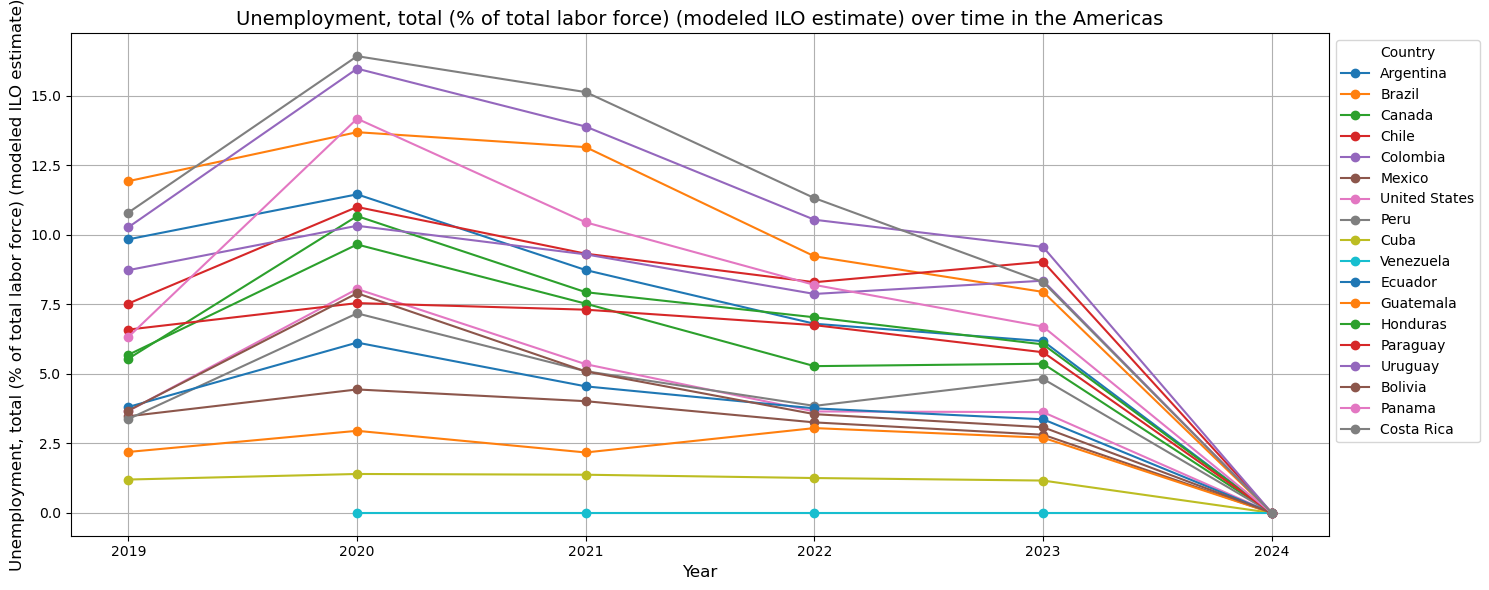

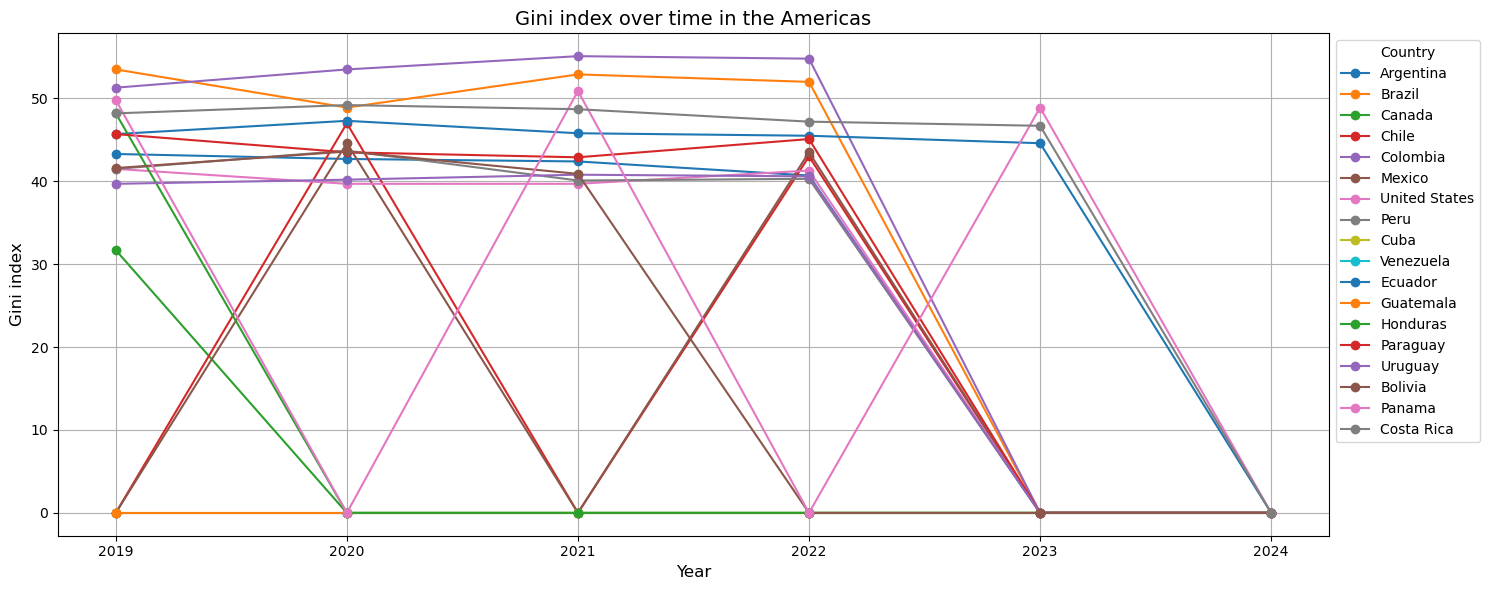

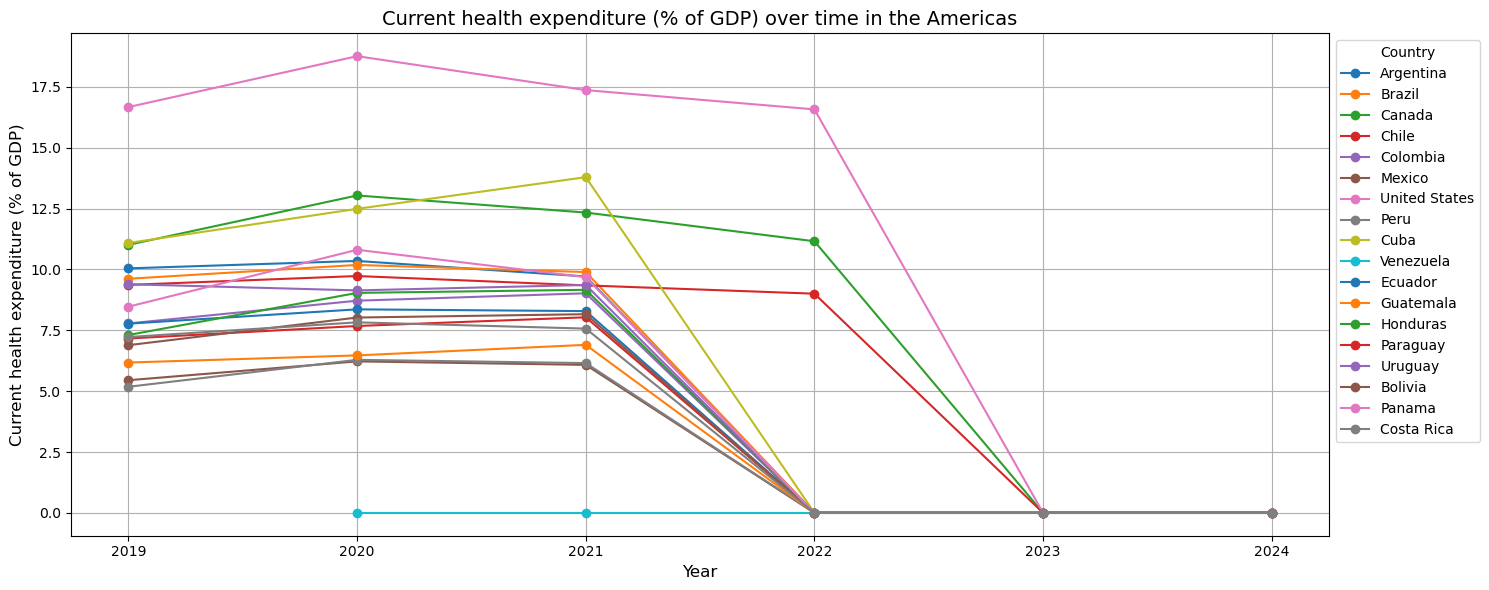

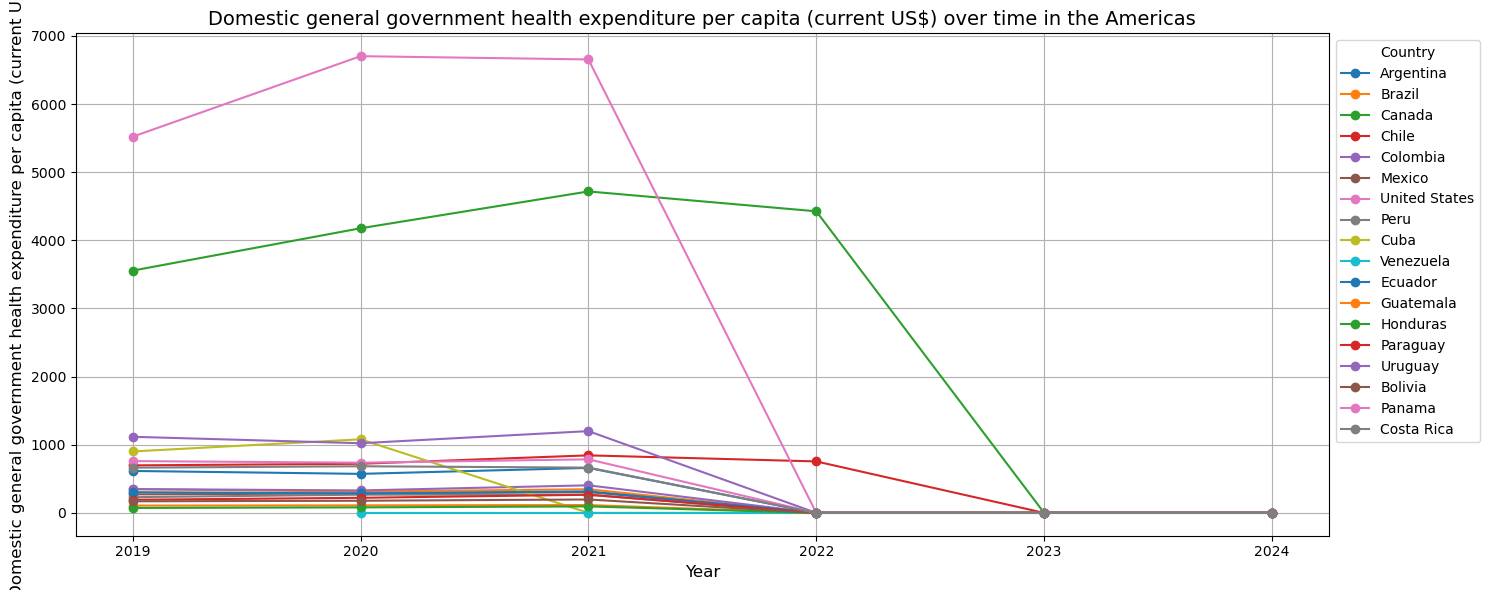

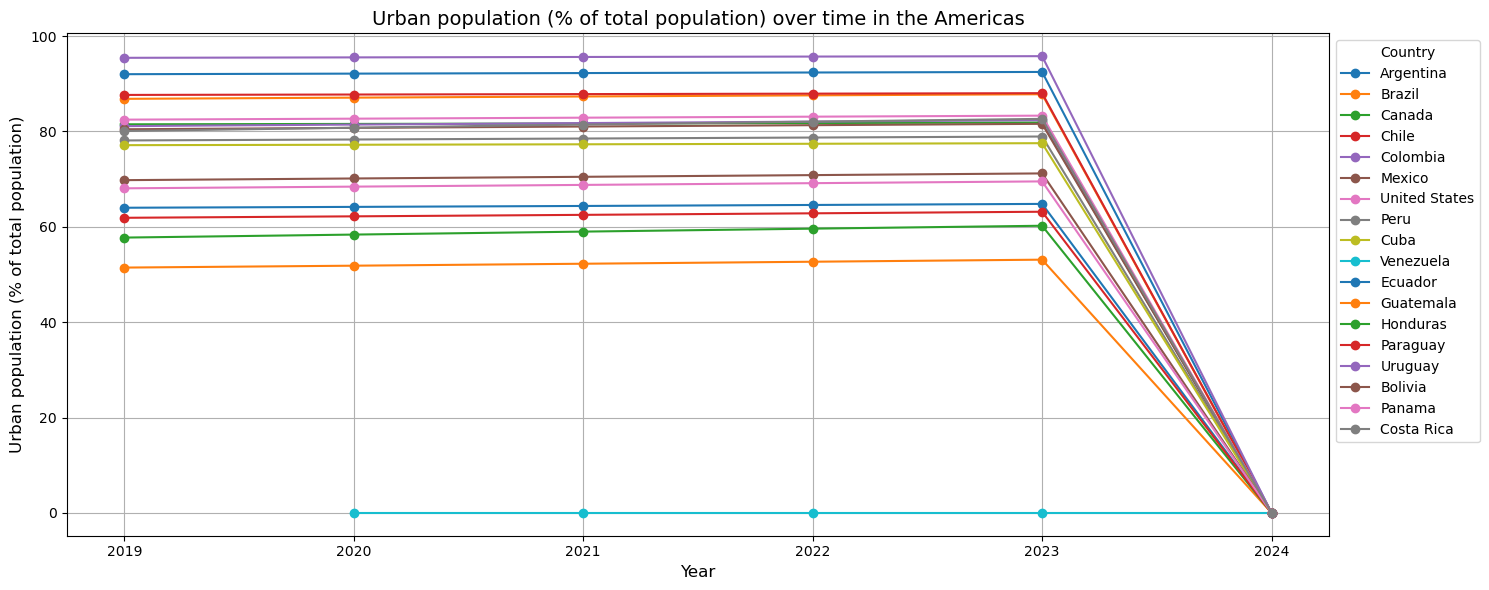

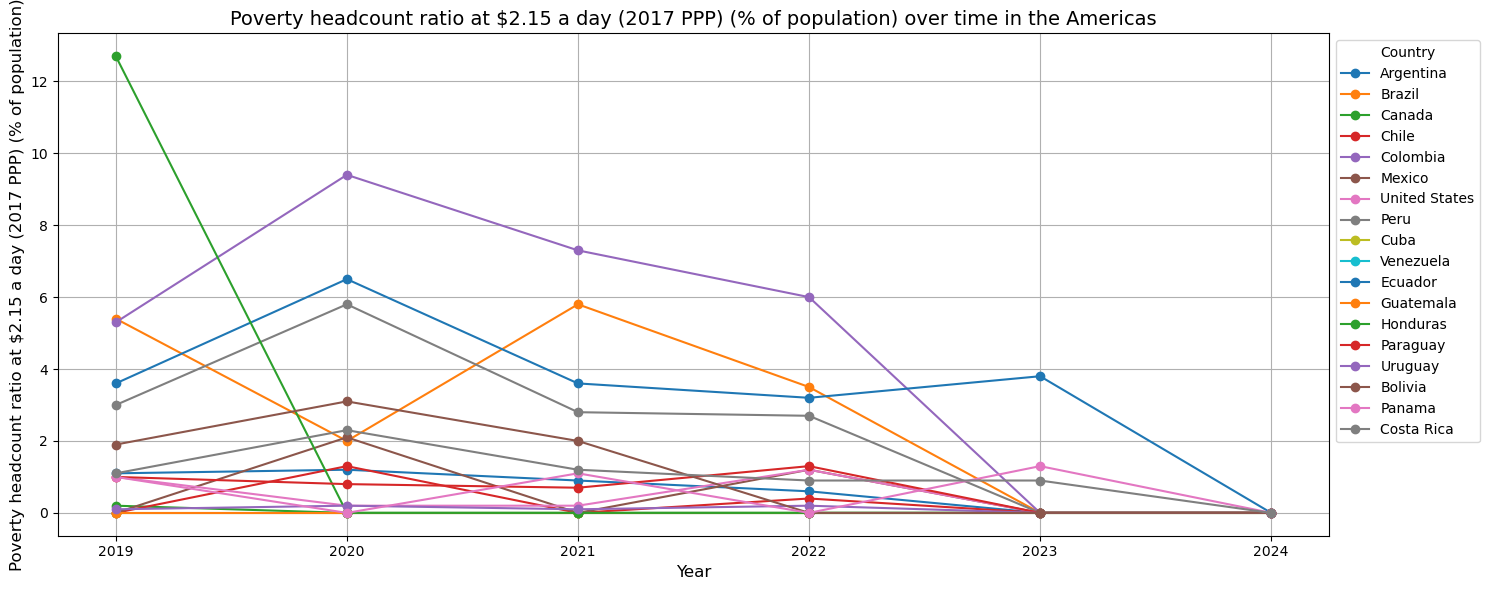

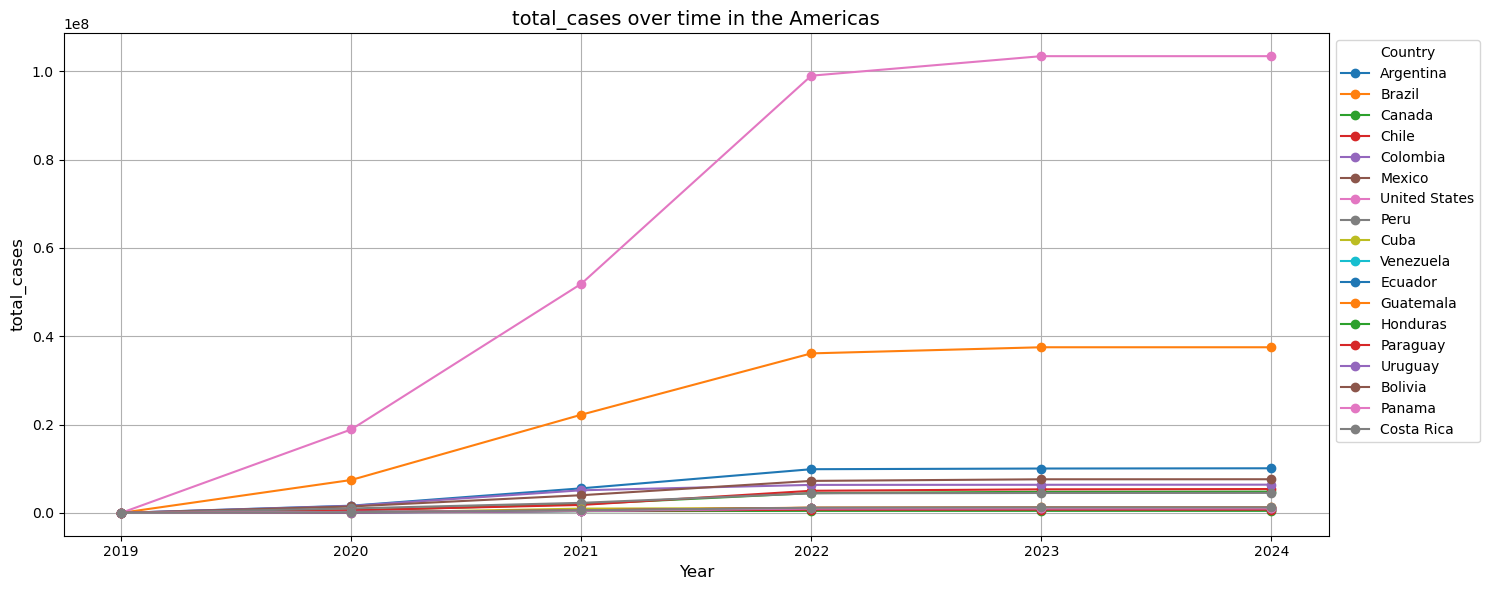

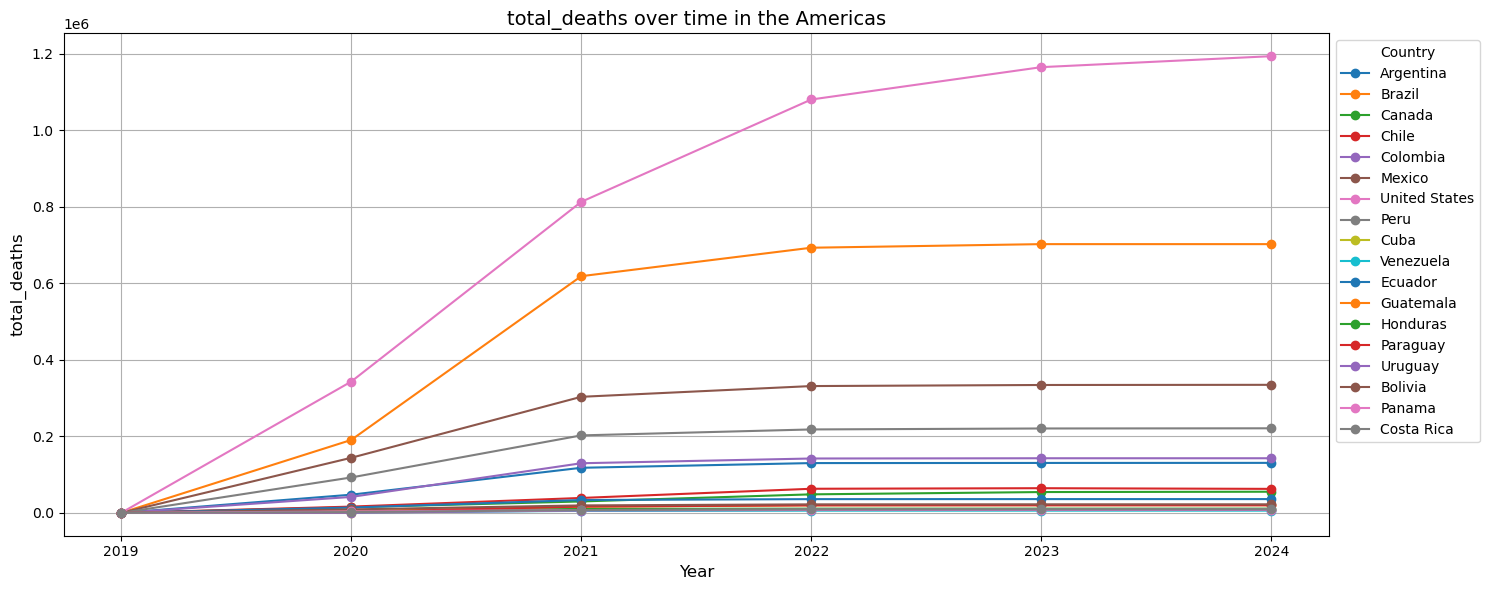

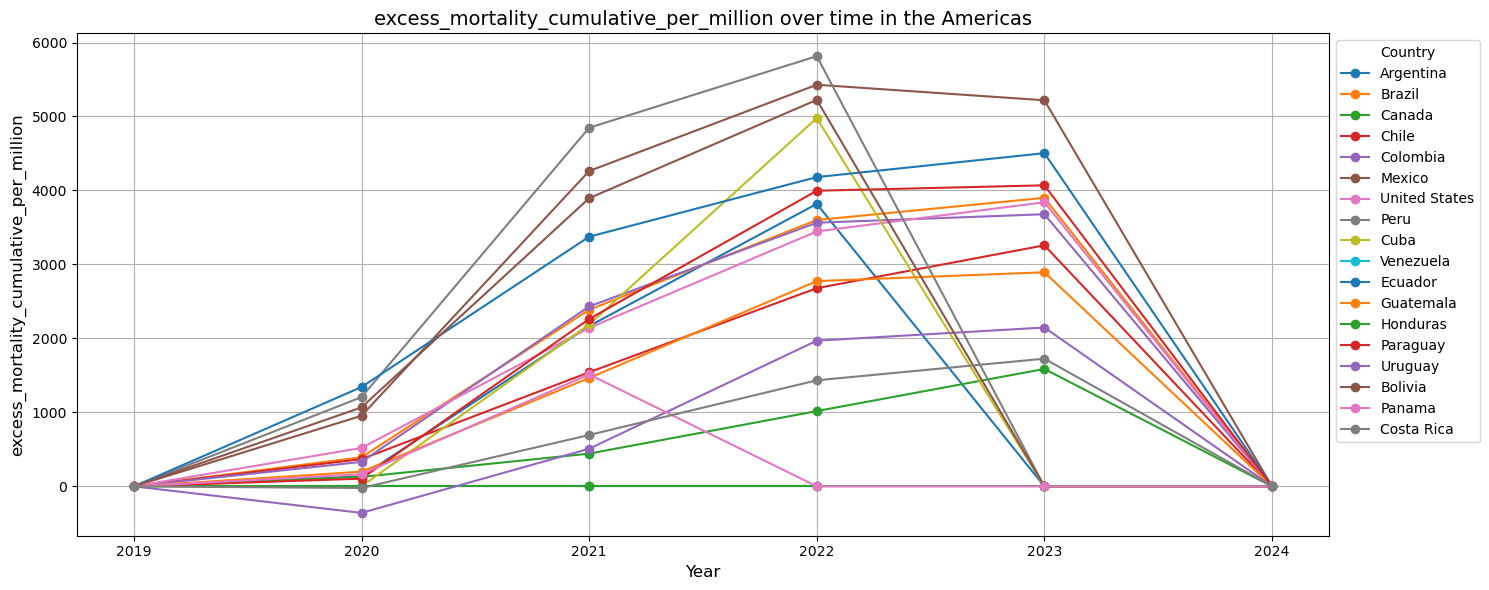

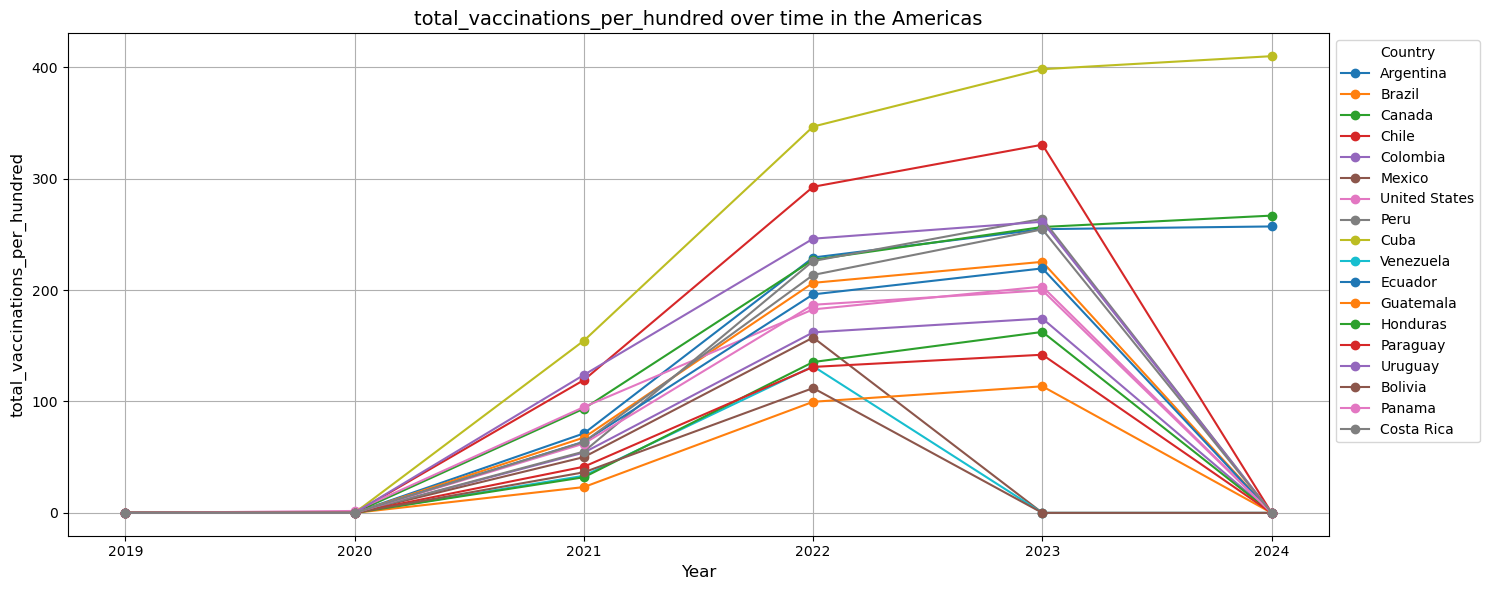

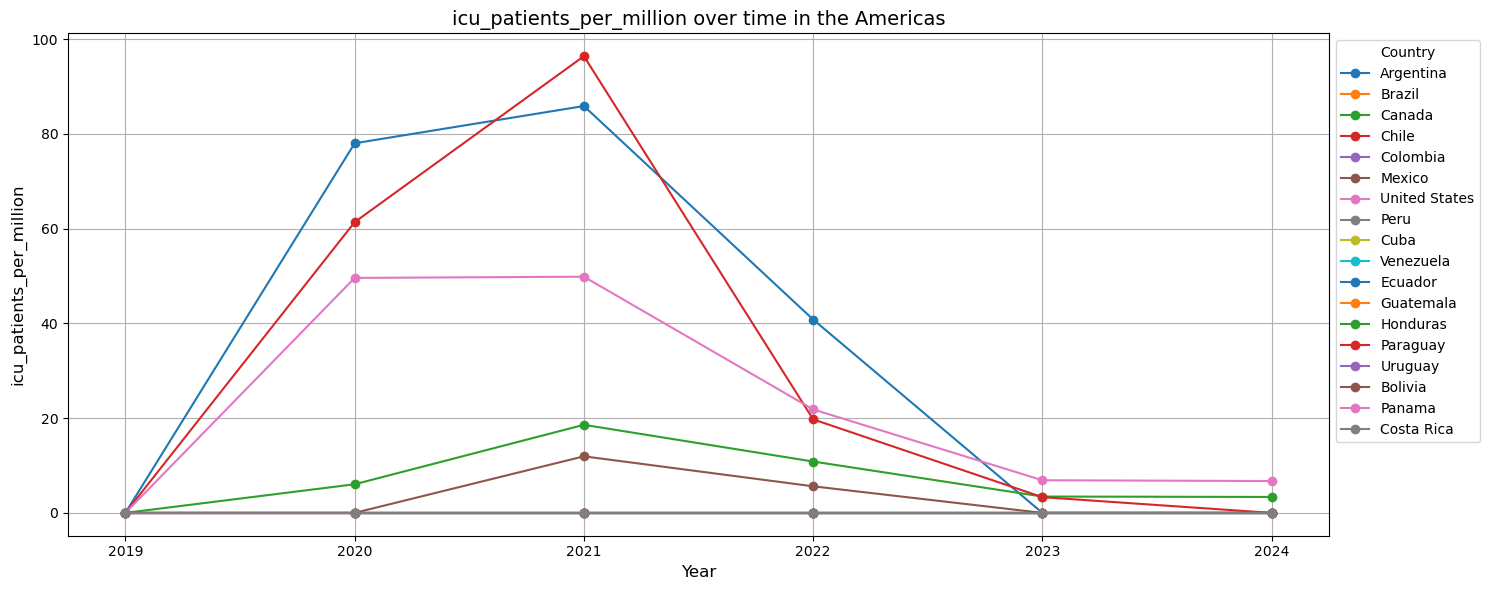

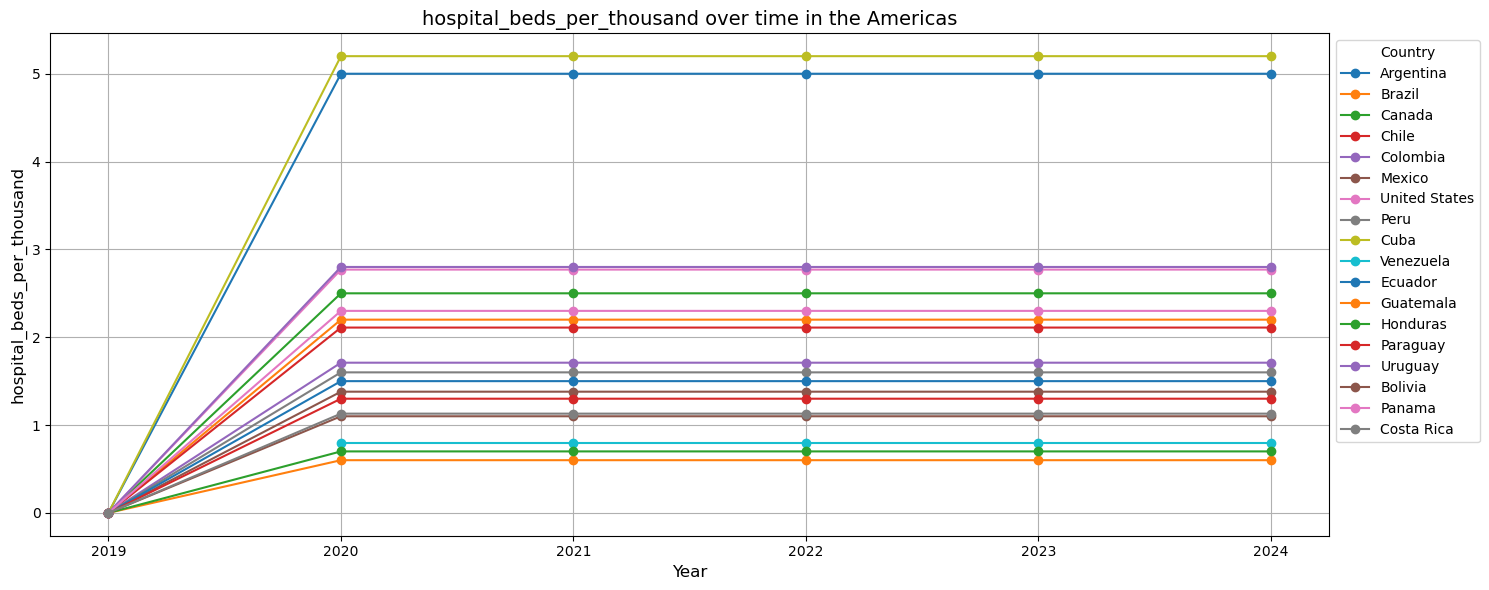

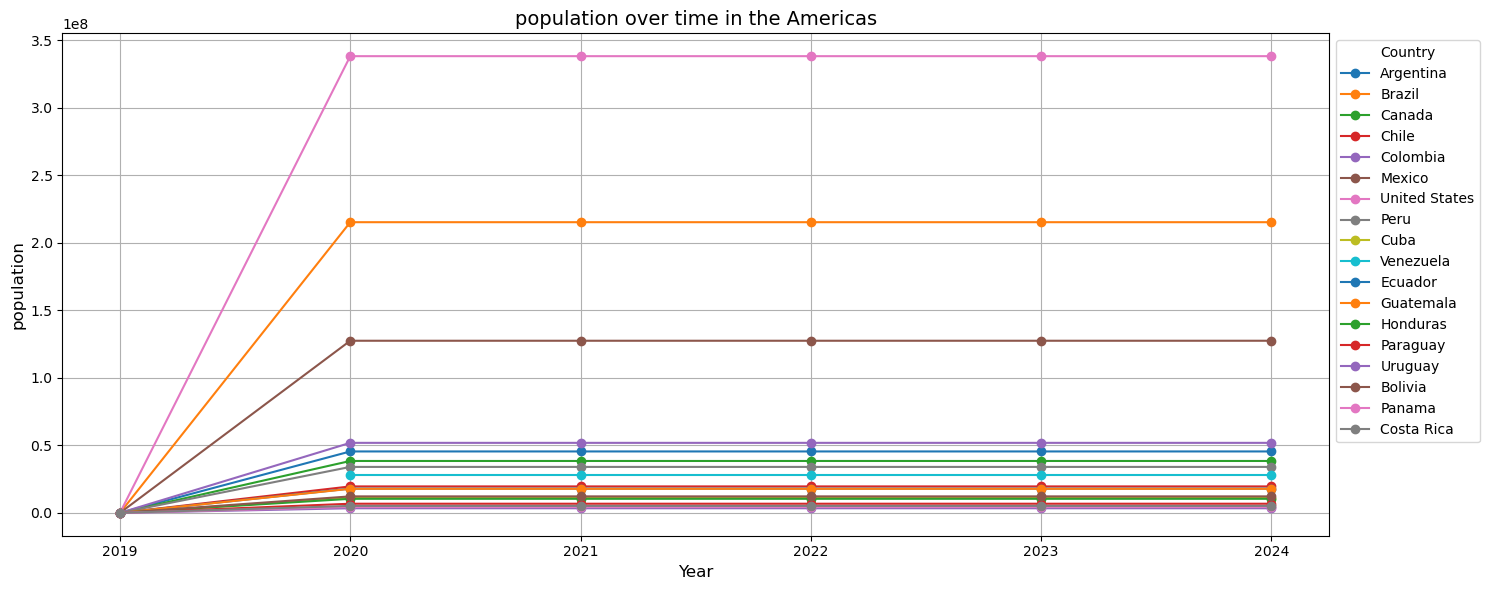

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Path to the SQLite database
db_path = "/Users/wangyulin/MADE/made-yulinwang/data/database.sqlite"

# Connect to the SQLite database and load the `merged_data` table
conn = sqlite3.connect(db_path)
merged_data = pd.read_sql_query("SELECT * FROM merged_data", conn)
conn.close()

# List of countries in the Americas to analyze
countries = [
    "Argentina", "Brazil", "Canada", "Chile", "Colombia", "Mexico", "United States", 
    "Peru", "Cuba", "Venezuela", "Ecuador", "Guatemala", "Honduras", "Paraguay", 
    "Uruguay", "Bolivia", "Panama", "Costa Rica"
]

# Filter the data for the Americas
data = merged_data[merged_data['country'].isin(countries)]

# Key socioeconomic and healthcare burden indicators for analysis
indicators = [
    "GDP per capita (current US$)",
    "Life expectancy at birth, total (years)",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Gini index",
    "Current health expenditure (% of GDP)",
    "Domestic general government health expenditure per capita (current US$)",
    "Urban population (% of total population)",
    "Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)",
    'total_cases', 'total_deaths',
    'excess_mortality_cumulative_per_million', 'total_vaccinations_per_hundred',
    'icu_patients_per_million', 'hospital_beds_per_thousand', 'population'
]

# Check if all indicators exist in the data
available_indicators = [col for col in indicators if col in data.columns]
missing_indicators = [col for col in indicators if col not in data.columns]

print(f"Available indicators: {available_indicators}")
print(f"Missing indicators: {missing_indicators}")

# Plotting time series for each country and selected indicators
for indicator in available_indicators:
    plt.figure(figsize=(15, 6))
    for country in countries:
        country_data = data[data['country'] == country]
        plt.plot(
            country_data['year'], 
            country_data[indicator], 
            label=country, 
            marker='o', 
            linestyle='-'
        )
    plt.title(f"{indicator} over time in the Americas", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(indicator, fontsize=12)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Country")
    plt.tight_layout()
    plt.grid(True)
    plt.show()


Available indicators: ['GDP per capita (current US$)', 'Life expectancy at birth, total (years)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)', 'Gini index', 'Current health expenditure (% of GDP)', 'Domestic general government health expenditure per capita (current US$)', 'Urban population (% of total population)', 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)', 'total_cases', 'total_deaths', 'excess_mortality_cumulative_per_million', 'total_vaccinations_per_hundred', 'icu_patients_per_million', 'hospital_beds_per_thousand', 'population']
Missing indicators: []


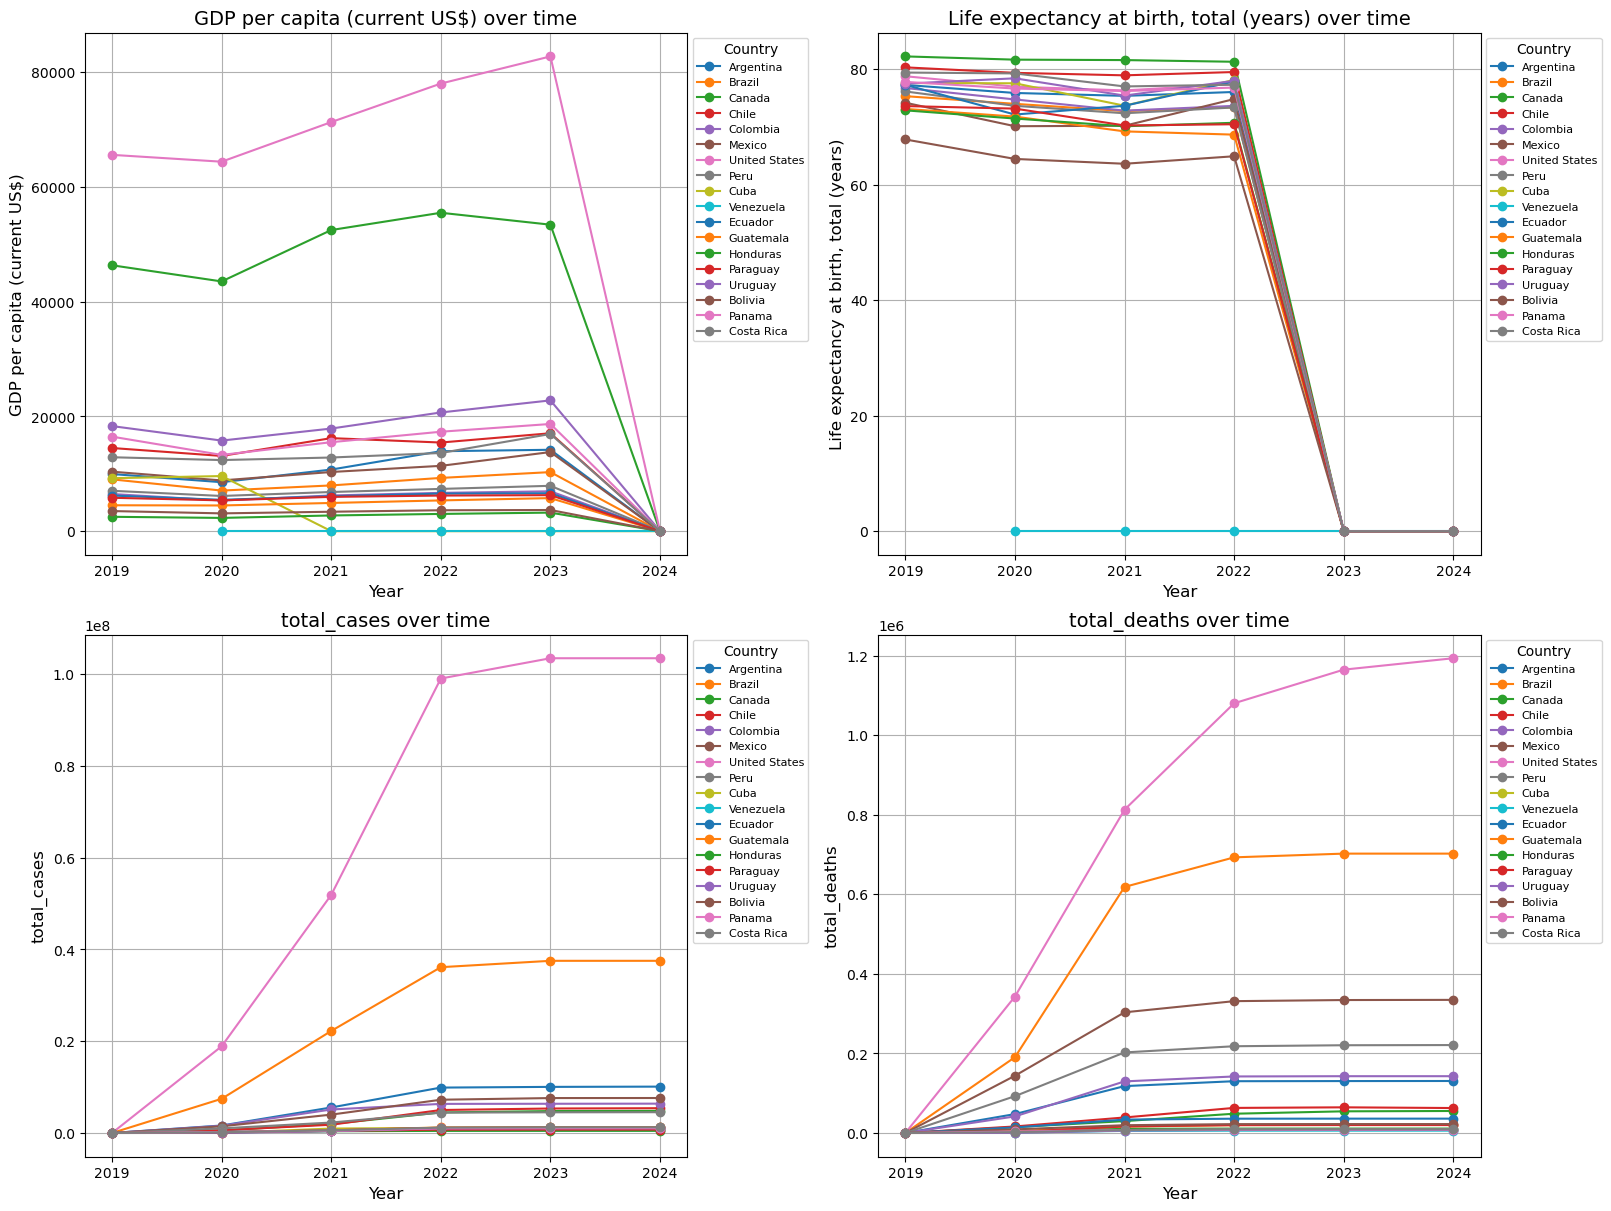

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Path to the SQLite database
db_path = "/Users/wangyulin/MADE/made-yulinwang/data/database.sqlite"

# Connect to the SQLite database and load the `merged_data` table
conn = sqlite3.connect(db_path)
merged_data = pd.read_sql_query("SELECT * FROM merged_data", conn)
conn.close()

# List of countries in the Americas to analyze
countries = [
    "Argentina", "Brazil", "Canada", "Chile", "Colombia", "Mexico", "United States", 
    "Peru", "Cuba", "Venezuela", "Ecuador", "Guatemala", "Honduras", "Paraguay", 
    "Uruguay", "Bolivia", "Panama", "Costa Rica"
]

# Filter the data for the Americas
data = merged_data[merged_data['country'].isin(countries)]

# Key socioeconomic and healthcare burden indicators for analysis
indicators = [
    "GDP per capita (current US$)",
    "Life expectancy at birth, total (years)",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Gini index",
    "Current health expenditure (% of GDP)",
    "Domestic general government health expenditure per capita (current US$)",
    "Urban population (% of total population)",
    "Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)",
    'total_cases', 'total_deaths',
    'excess_mortality_cumulative_per_million', 'total_vaccinations_per_hundred',
    'icu_patients_per_million', 'hospital_beds_per_thousand', 'population'
]

# Check if all indicators exist in the data
available_indicators = [col for col in indicators if col in data.columns]
missing_indicators = [col for col in indicators if col not in data.columns]

print(f"Available indicators: {available_indicators}")
print(f"Missing indicators: {missing_indicators}")

# User selects which indicators to include in the plot
selected_indicators = [
    "GDP per capita (current US$)",
    "Life expectancy at birth, total (years)",
    "total_cases", "total_deaths"
]

# Number of rows and columns for subplots
n_rows = (len(selected_indicators) + 1) // 2  # Calculate rows for a 2-column layout
n_cols = 2

# Create a single figure for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows), constrained_layout=True)
axes = axes.flatten()  # Flatten axes for easier iteration

# Plot each selected indicator
for idx, indicator in enumerate(selected_indicators):
    ax = axes[idx]
    for country in countries:
        country_data = data[data['country'] == country]
        ax.plot(
            country_data['year'], 
            country_data[indicator], 
            label=country, 
            marker='o', 
            linestyle='-'
        )
    ax.set_title(f"{indicator} over time", fontsize=14)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel(indicator, fontsize=12)
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Country", fontsize=8)

# Remove empty subplots if the number of indicators is odd
if len(selected_indicators) < len(axes):
    for ax in axes[len(selected_indicators):]:
        fig.delaxes(ax)

# Show the full figure
plt.show()


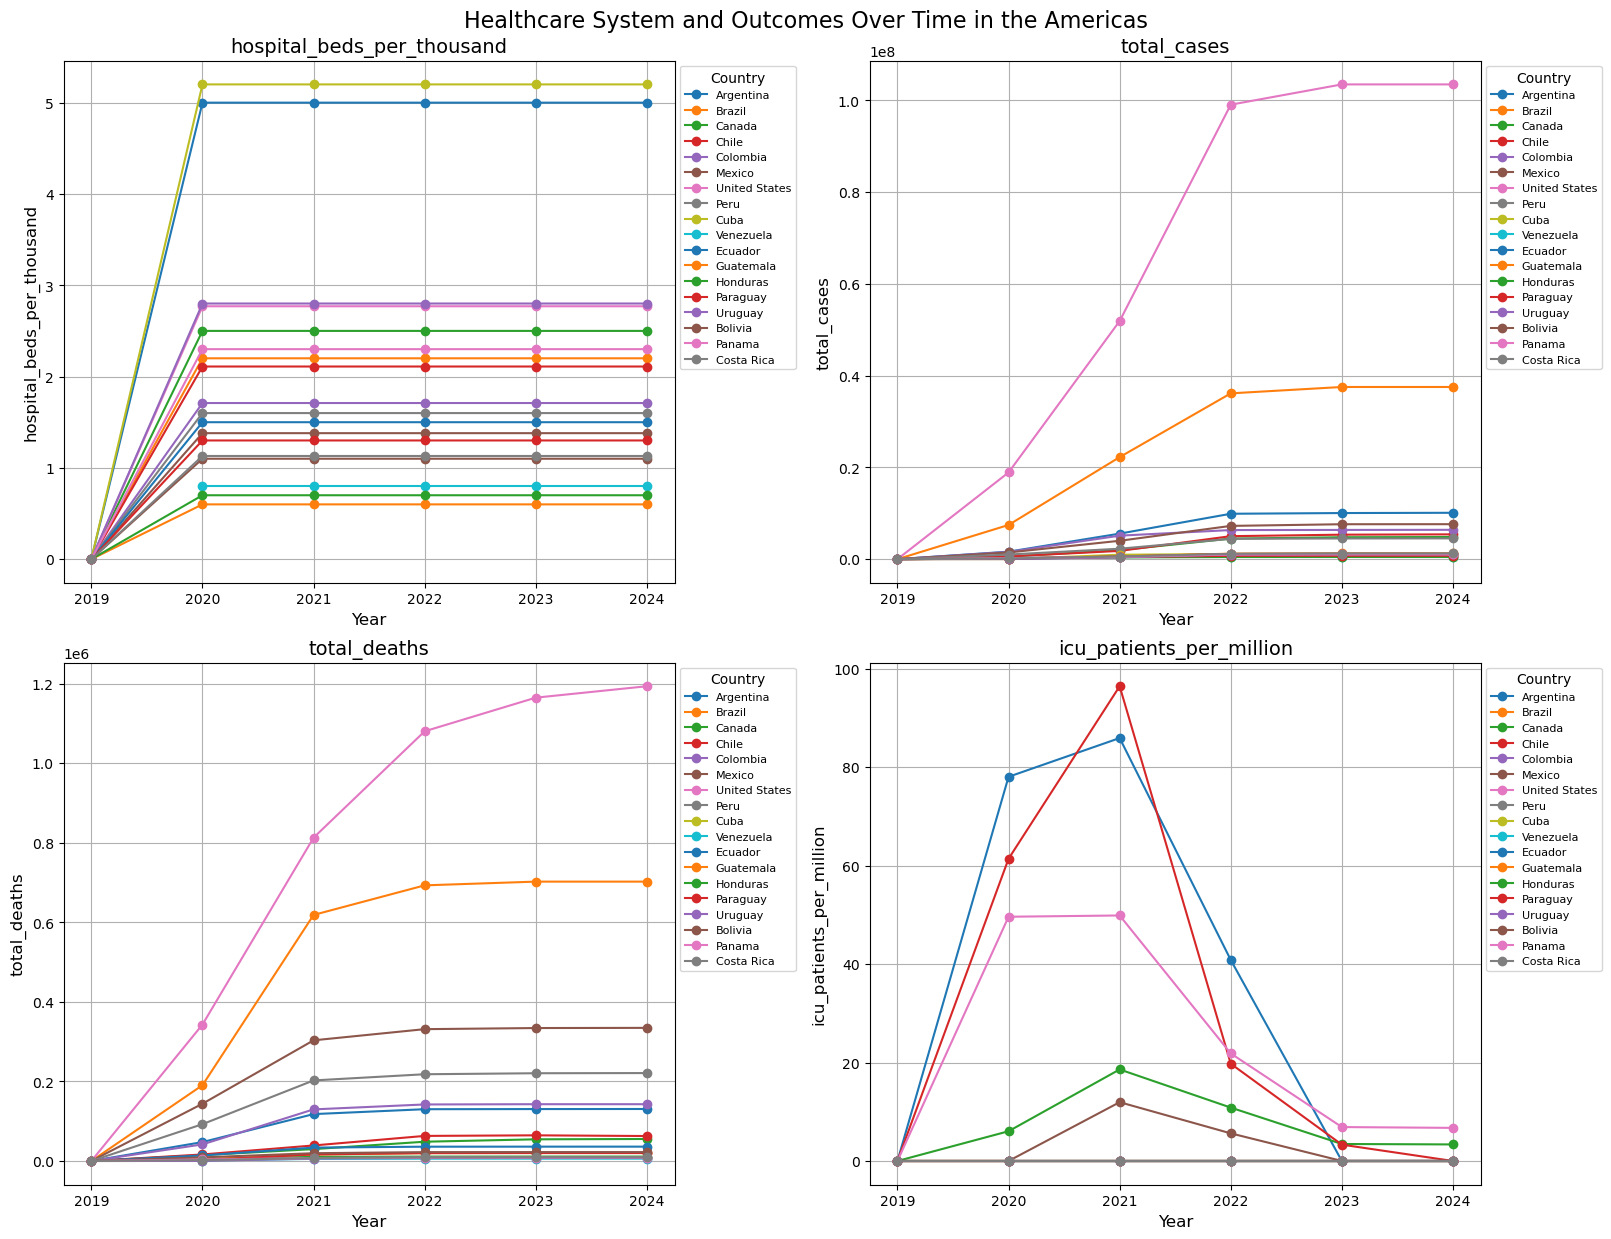

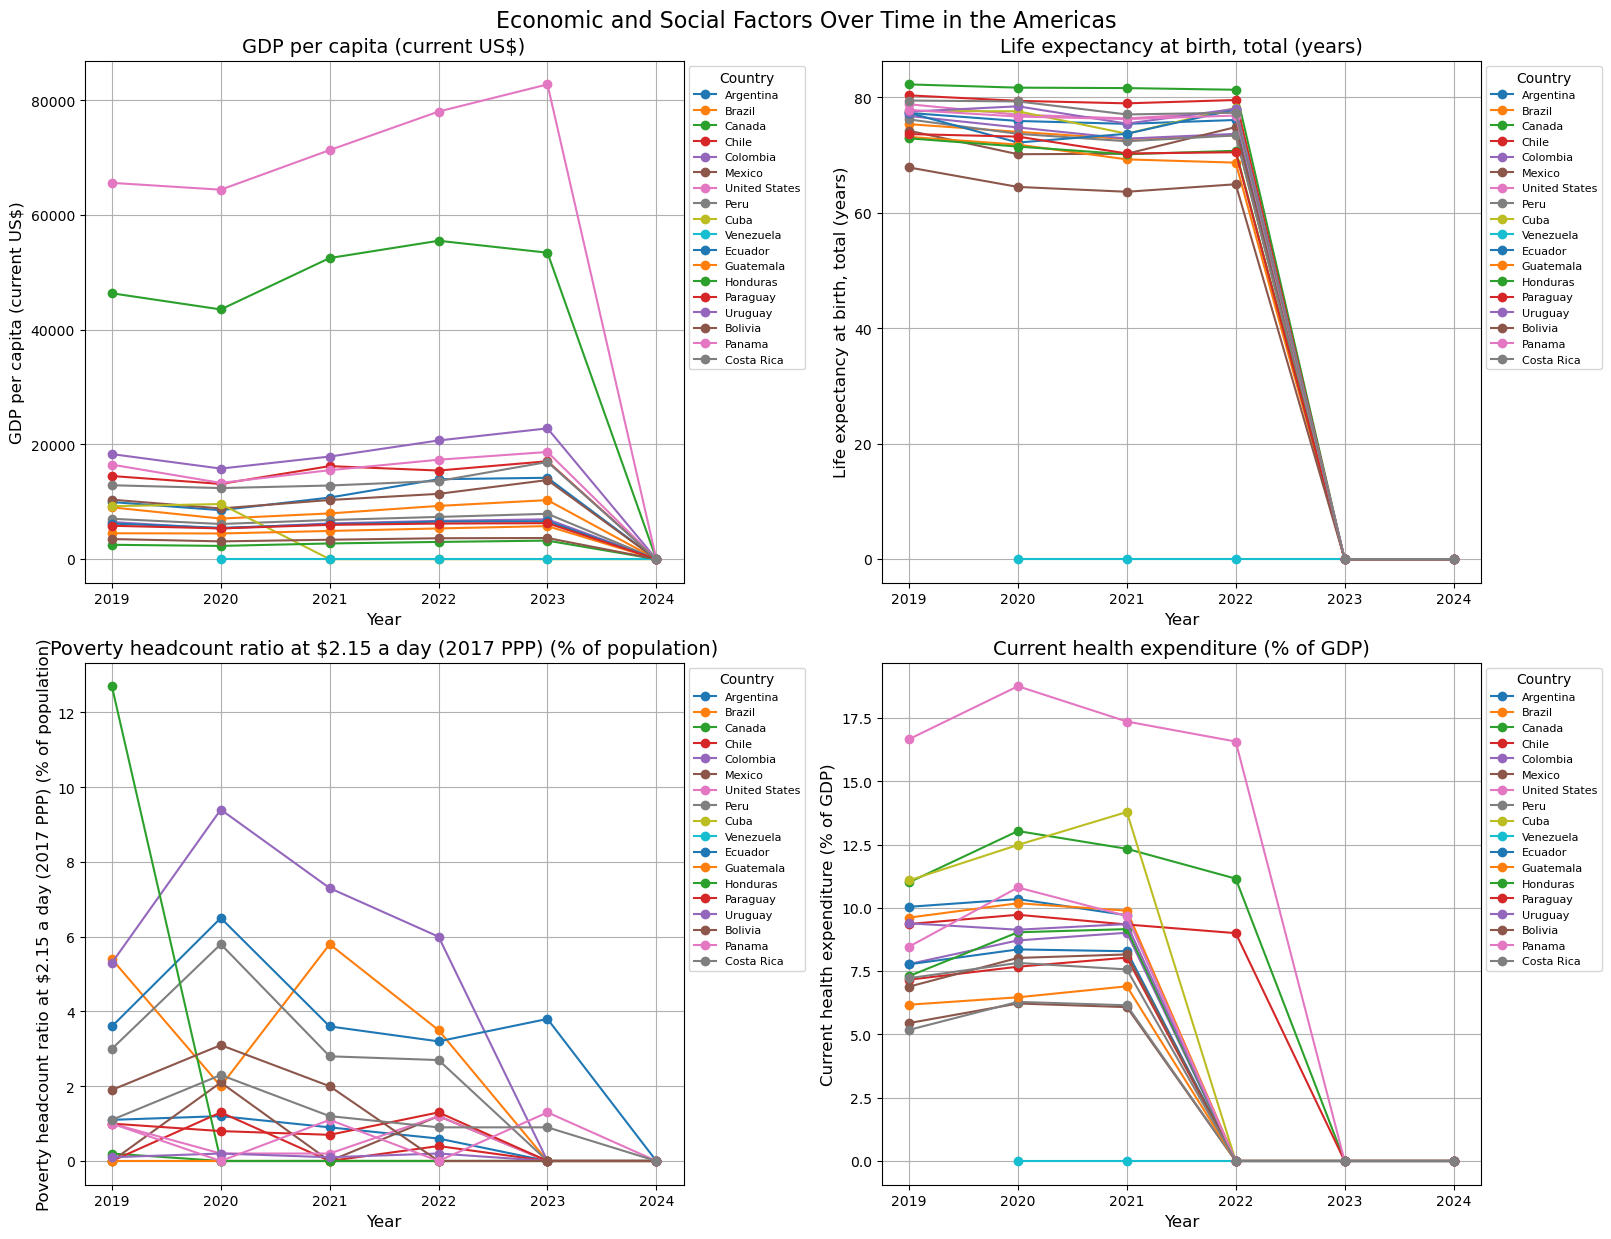

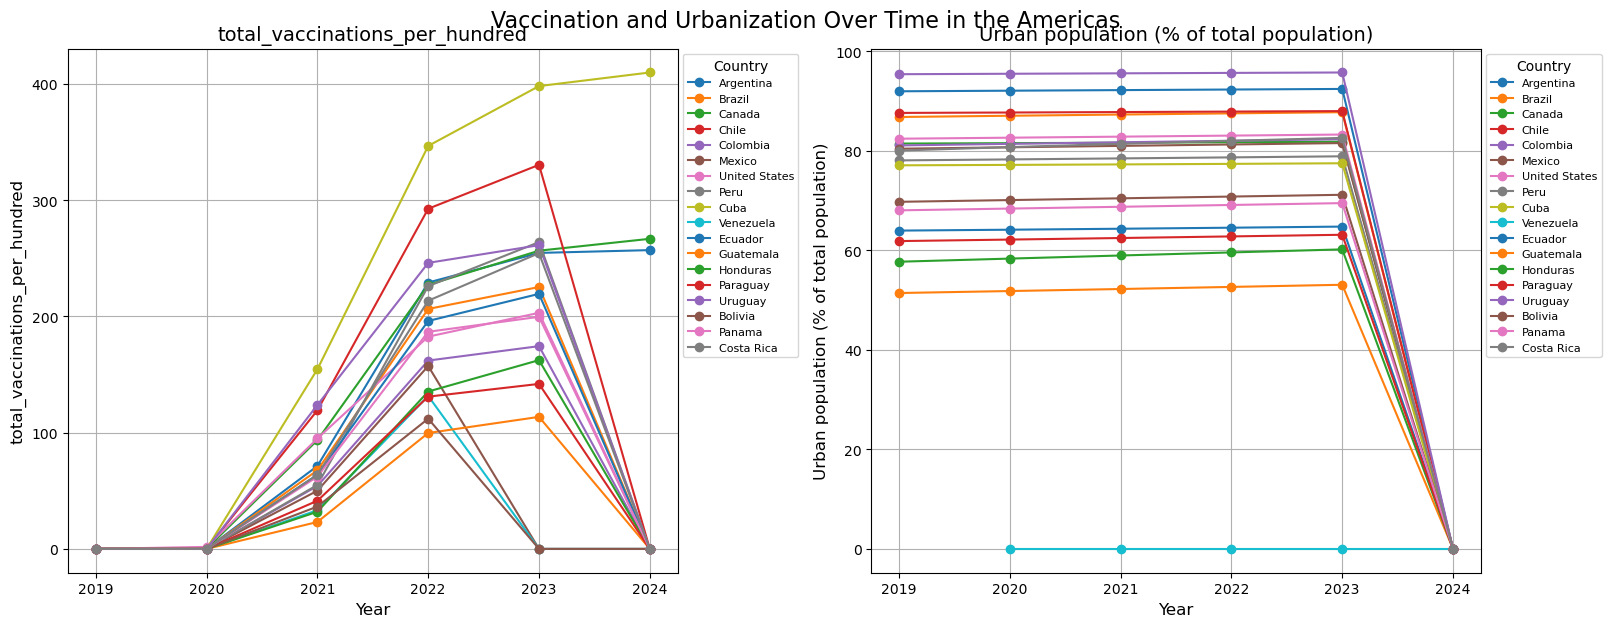

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Path to the SQLite database
db_path = "/Users/wangyulin/MADE/made-yulinwang/data/database.sqlite"

# Connect to the SQLite database and load the `merged_data` table
conn = sqlite3.connect(db_path)
merged_data = pd.read_sql_query("SELECT * FROM merged_data", conn)
conn.close()

# List of countries in the Americas to analyze
countries = [
    "Argentina", "Brazil", "Canada", "Chile", "Colombia", "Mexico", "United States", 
    "Peru", "Cuba", "Venezuela", "Ecuador", "Guatemala", "Honduras", "Paraguay", 
    "Uruguay", "Bolivia", "Panama", "Costa Rica"
]

# Filter the data for the Americas
data = merged_data[merged_data['country'].isin(countries)]

# Indicators grouped into meaningful categories
indicator_groups = {
    "Healthcare System and Outcomes": [
        "hospital_beds_per_thousand", 
        "total_cases", 
        "total_deaths", 
        "icu_patients_per_million"
    ],
    "Economic and Social Factors": [
        "GDP per capita (current US$)", 
        "Life expectancy at birth, total (years)", 
        "Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)", 
        "Current health expenditure (% of GDP)"
    ],
    "Vaccination and Urbanization": [
        "total_vaccinations_per_hundred", 
        "Urban population (% of total population)"
    ]
}

# Function to plot grouped indicators
def plot_indicators(data, indicators, title):
    n_cols = 2
    n_rows = (len(indicators) + 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows), constrained_layout=True)
    axes = axes.flatten()
    
    for idx, indicator in enumerate(indicators):
        ax = axes[idx]
        for country in countries:
            country_data = data[data['country'] == country].dropna(subset=[indicator])
            if not country_data.empty:
                ax.plot(
                    country_data['year'], 
                    country_data[indicator], 
                    label=country, 
                    marker='o', 
                    linestyle='-'
                )
        ax.set_title(indicator, fontsize=14)
        ax.set_xlabel("Year", fontsize=12)
        ax.set_ylabel(indicator, fontsize=12)
        ax.grid(True)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Country", fontsize=8)
    
    # Remove empty subplots if the number of indicators is odd
    for idx in range(len(indicators), len(axes)):
        fig.delaxes(axes[idx])
    
    # Set overall title
    fig.suptitle(title, fontsize=16, y=1.02)
    plt.show()

# Plot each group of indicators
for group, indicators in indicator_groups.items():
    plot_indicators(data, indicators, title=f"{group} Over Time in the Americas")
